In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use("bioAI.mplstyle")
import torch
import tqdm
import scipy

import sys
sys.path.append('../')
from methods import Hexagon, HexagonalGCs, permutation_test
from models import JacobianCI, JitterCI
from plotting_functions import scatter3d, set_size, colorbar_axis
from utils import rotation_matrix

In [3]:
color_cycler = plt.rcParams['axes.prop_cycle'].by_key()['color']
savefigs = False
dpi=150

In [5]:
model = JacobianCI(ncells=7,lr=1e-3, shift=0, p_magnitude=0, seed=3)

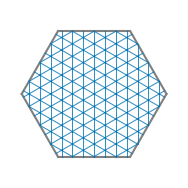

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

figsize = set_size(fraction=(1/4,1/4),mode='square')
fig, ax = plt.subplots(figsize=figsize)#,dpi=300)

# Assuming model, color_cycler, and other necessary components are defined
n = 10
mesh = model.unit_cell.mesh(n)
for b in model.unit_cell.basis:
    mesh = np.concatenate([mesh, mesh[:n**2] + 2*b], axis=0)

dists = []
#for i in tqdm.trange(len(mesh)):
#    p1 = mesh[i]
#    dists.append(model.unit_cell.geodesic(p1[None], mesh))
dists = scipy.spatial.distance.cdist(mesh, mesh)
dists = np.array(dists)
idxs = np.argsort(dists, axis=1)
dist_to_neighbor = np.unique(np.around(dists[0], 8))[1]

fig, ax = model.unit_cell.plot(fig, ax, color='grey')
ax.axis('equal')
ax.axis('off')

# Define the hexagon boundary
hexagon = model.unit_cell.hpoints
hex_path = Path(hexagon)

def is_inside(point):
    return hex_path.contains_point(point*0.999)
    #return model.unit_cell.is_in_hexagon(point)

def line_hexagon_intersection(p1, p2):
    # Implement the logic to find the intersection point of the line with the hexagon
    return (p1 + p2) / 2  # Placeholder

kwargs = {'lw':0.5, 'alpha':0.8}
plotted = set()
for i, p1 in enumerate(mesh[:n**2]):
    for j, p2 in enumerate(mesh):
        if np.around(dists[i,j], 8) != dist_to_neighbor:
            continue
        if (i, j) in plotted or (j, i) in plotted:
            continue
        if is_inside(p1) and is_inside(p2):
            ax.plot(*zip(p1, p2), color=color_cycler[0], **kwargs)
            plotted.add((i, j))
        elif (is_inside(p1) != is_inside(p2)):# and False:
            intersection = line_hexagon_intersection(p1, p2)
            if not is_inside(intersection):
                continue
            if is_inside(p1):
                ax.plot(*zip(p1, intersection), color=color_cycler[0], **kwargs)
            else:
                ax.plot(*zip(intersection, p2), color=color_cycler[0], **kwargs)
            plotted.add((i, j))


savefigs = True
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
if savefigs:
    fig.savefig('../results/mesh-high-res')#, bbox_inches='tight', pad_inches=0)


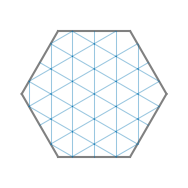

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

figsize = set_size(fraction=(1/4,1/4),mode='square')
fig, ax = plt.subplots(figsize=figsize)#,dpi=300)

# Assuming model, color_cycler, and other necessary components are defined
n = 5
mesh = model.unit_cell.mesh(n)
for b in model.unit_cell.basis:
    mesh = np.concatenate([mesh, mesh[:n**2] + 2*b], axis=0)

dists = []
#for i in tqdm.trange(len(mesh)):
#    p1 = mesh[i]
#    dists.append(model.unit_cell.geodesic(p1[None], mesh))
dists = scipy.spatial.distance.cdist(mesh, mesh)
dists = np.array(dists)
idxs = np.argsort(dists, axis=1)
dist_to_neighbor = np.unique(np.around(dists[0], 8))[1]

fig, ax = model.unit_cell.plot(fig, ax, color='grey')
ax.axis('equal')
ax.axis('off')

# Define the hexagon boundary
hexagon = model.unit_cell.hpoints
hex_path = Path(hexagon)

def is_inside(point):
    return hex_path.contains_point(point*0.999)
    #return model.unit_cell.is_in_hexagon(point)

def line_hexagon_intersection(p1, p2):
    # Implement the logic to find the intersection point of the line with the hexagon
    return (p1 + p2) / 2  # Placeholder

kwargs = {'lw':0.5, 'alpha':0.4}
plotted = set()
for i, p1 in enumerate(mesh[:n**2]):
    for j, p2 in enumerate(mesh):
        if np.around(dists[i,j], 8) != dist_to_neighbor:
            continue
        if (i, j) in plotted or (j, i) in plotted:
            continue
        if is_inside(p1) and is_inside(p2):
            ax.plot(*zip(p1, p2), color=color_cycler[0], **kwargs)
            plotted.add((i, j))
        elif (is_inside(p1) != is_inside(p2)):# and False:
            intersection = line_hexagon_intersection(p1, p2)
            if not is_inside(intersection):
                continue
            if is_inside(p1):
                ax.plot(*zip(p1, intersection), color=color_cycler[0], **kwargs)
            else:
                ax.plot(*zip(intersection, p2), color=color_cycler[0], **kwargs)
            plotted.add((i, j))


savefigs = True
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
if savefigs:
    fig.savefig('../results/mesh-low-res')#, bbox_inches='tight', pad_inches=0)
